## 1. Import Required Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# Set style for better visualizations
plt.style.use('default')
sns.set_theme()

## 2. Load and Prepare Data

In [9]:
file_path = "train.csv"
df = pd.read_csv(file_path)

print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location            

## 3. Data Preprocessing

In [10]:
# Handle categorical target variable
target_col = df.columns[-1]
if df[target_col].dtype == 'object':
    le = LabelEncoder()
    df[target_col] = le.fit_transform(df[target_col])

# Separate features and target
X = df.drop(columns=[target_col])
y = df[target_col]

# Store original feature names
feature_names = X.columns

# Handle categorical features
X = pd.get_dummies(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Data preprocessing completed.")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Data preprocessing completed.
Training set shape: (83123, 29)
Testing set shape: (20781, 29)


## 4. Model Training and Prediction

In [11]:
# Initialize and train the model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

print("Model training and prediction completed.")

Model training and prediction completed.


## 5. Model Evaluation

In [12]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.9645

Confusion Matrix:
[[11500   213]
 [  525  8543]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     11713
           1       0.98      0.94      0.96      9068

    accuracy                           0.96     20781
   macro avg       0.97      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



## 6. Model Performance Visualizations

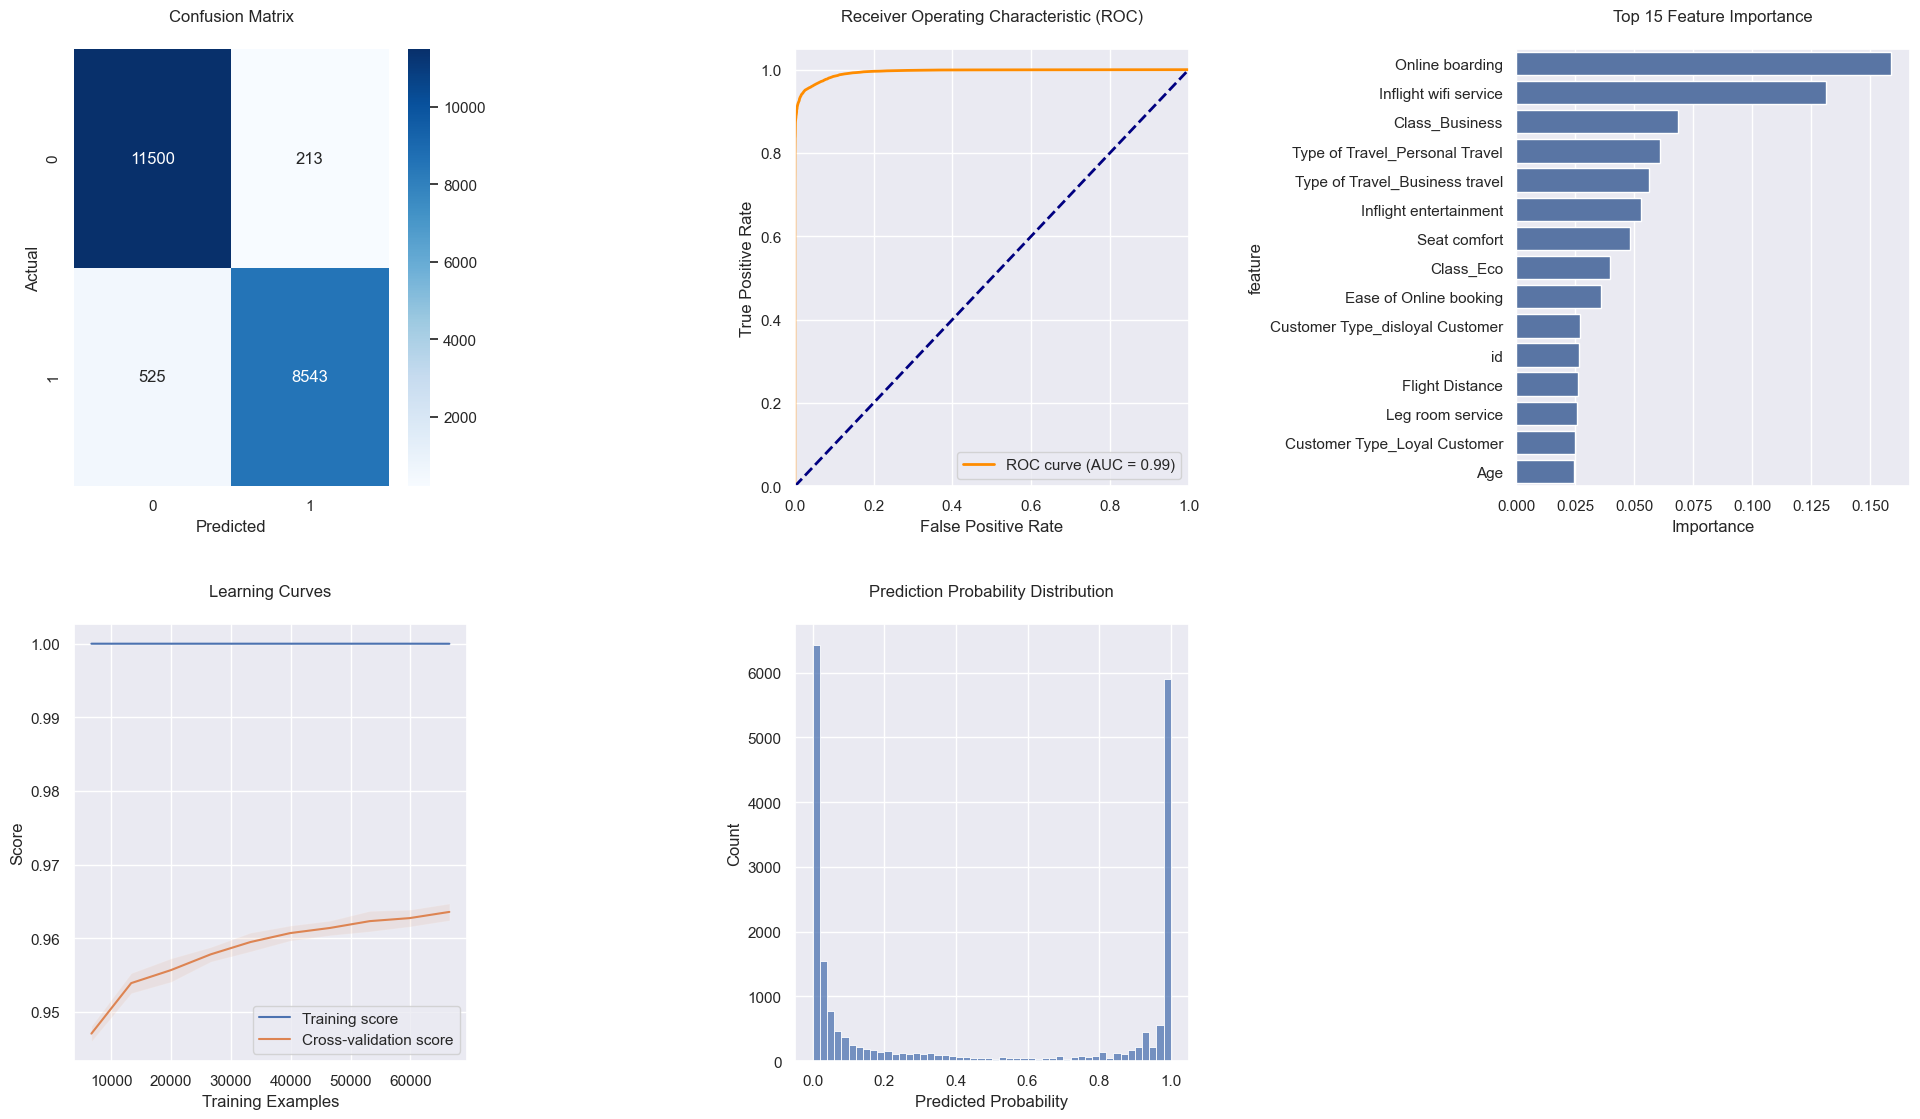

In [13]:
# Create a figure with subplots
plt.figure(figsize=(20, 12))

# 1. Confusion Matrix Heatmap
plt.subplot(2, 3, 1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix', pad=20)
plt.xlabel('Predicted')
plt.ylabel('Actual')

# 2. ROC Curve
plt.subplot(2, 3, 2)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)', pad=20)
plt.legend(loc="lower right")

# 3. Feature Importance Plot
plt.subplot(2, 3, 3)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': clf.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False).head(15)
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Top 15 Feature Importance', pad=20)
plt.xlabel('Importance')

# 4. Learning Curves
plt.subplot(2, 3, 4)
train_sizes, train_scores, test_scores = learning_curve(
    clf, X_train, y_train, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title('Learning Curves', pad=20)
plt.legend(loc='best')

# 5. Prediction Distribution
plt.subplot(2, 3, 5)
sns.histplot(data=pd.DataFrame({'Probability': y_pred_proba}), x='Probability', bins=50)
plt.title('Prediction Probability Distribution', pad=20)
plt.xlabel('Predicted Probability')
plt.ylabel('Count')

# Adjust layout and display plots
plt.tight_layout(pad=3.0)
plt.show()